# Importar bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore") 

# EDA

## Carga de datos y preevaluación de datos

In [2]:
# Cargar dataset de ofertas relámpago en un DataFrame
path = "../Data/ofertas_relampago.csv"
df = pd.read_csv(path)

In [3]:
# Evaluar cantidad de registros y columnas
registros = df.shape[0]
columnas = df.shape[1]
print(f"Cantidad de registros: {registros}\nCantidad de columnas: {columnas}")

Cantidad de registros: 48746
Cantidad de columnas: 13


In [4]:
# Evaluar primeros 3 registros
df.head(3)

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS


In [5]:
# Evaluar columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OFFER_START_DATE           48746 non-null  object 
 1   OFFER_START_DTTM           48746 non-null  object 
 2   OFFER_FINISH_DTTM          48746 non-null  object 
 3   OFFER_TYPE                 48746 non-null  object 
 4   INVOLVED_STOCK             48746 non-null  int64  
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64  
 6   SOLD_AMOUNT                24579 non-null  float64
 7   SOLD_QUANTITY              24579 non-null  float64
 8   ORIGIN                     11316 non-null  object 
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object 
 10  DOM_DOMAIN_AGG1            48746 non-null  object 
 11  VERTICAL                   48746 non-null  object 
 12  DOMAIN_ID                  48746 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usag

**Se observan las columnas con sus distintos tipos de datos, que serán evaluados posteriormente. Además, se encuentran valores nulos en 3 columnas.**

In [6]:
# Evaluar nulos
df.isna().sum()

OFFER_START_DATE                 0
OFFER_START_DTTM                 0
OFFER_FINISH_DTTM                0
OFFER_TYPE                       0
INVOLVED_STOCK                   0
REMAINING_STOCK_AFTER_END        0
SOLD_AMOUNT                  24167
SOLD_QUANTITY                24167
ORIGIN                       37430
SHIPPING_PAYMENT_TYPE            0
DOM_DOMAIN_AGG1                  0
VERTICAL                         0
DOMAIN_ID                        0
dtype: int64

**Las columnas "SOLD_AMOUNT", "SOLD_QUANTITY" y "ORIGIN" contienen nulos.**

In [7]:
# Evaluar estadísticas descriptivas de atributos numéricos
df.describe()

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
count,48746.000000,48746.000000,24579.000000,24579.000000
mean,35.007508,30.565216,51.208898,10.851052
std,206.761058,195.813806,175.254414,45.475305
min,1.000000,-192.000000,0.280000,1.000000
25%,5.000000,4.000000,5.730000,1.000000
50%,10.000000,8.000000,12.420000,3.000000
75%,15.000000,15.000000,30.925000,6.000000
max,9000.000000,8635.000000,4836.570000,1646.000000


In [8]:
# Evaluar duplicados
duplicados = df.duplicated()
duplicados.sum()

926

**Se encuentran 926 duplicados.**

## Evaluar duplicados

**Investigar duplicados para entender si es necesario eliminarlos.**

In [9]:
# Ver duplicados en orden
df[df.duplicated(keep=False)].sort_values(by=[col for col in df.columns])

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
39626,2021-06-01,2021-06-01 07:00:00+00:00,2021-06-01 13:00:02+00:00,lightning_deal,5,3,47.14,1.0,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
39640,2021-06-01,2021-06-01 07:00:00+00:00,2021-06-01 13:00:02+00:00,lightning_deal,5,3,47.14,1.0,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
39629,2021-06-01,2021-06-01 07:00:00+00:00,2021-06-01 13:00:08+00:00,lightning_deal,5,4,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
39630,2021-06-01,2021-06-01 07:00:00+00:00,2021-06-01 13:00:08+00:00,lightning_deal,5,4,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
40007,2021-06-01,2021-06-01 07:00:00+00:00,2021-06-01 13:00:08+00:00,lightning_deal,15,15,NaN,NaN,NaN,free_shipping,APPAREL ACCESORIES,APP & SPORTS,MLM-SUNGLASSES
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23460,2021-07-31,2021-07-31 16:00:00+00:00,2021-08-01 00:00:00+00:00,lightning_deal,5,5,NaN,NaN,A,free_shipping,ELECTRONICS,CE,MLM-RANGES
24399,2021-07-31,2021-07-31 19:00:00+00:00,2021-08-01 01:00:03+00:00,lightning_deal,15,15,NaN,NaN,NaN,none,HOME&DECOR,HOME & INDUSTRY,MLM-CHRISTMAS_LIGHTS
24401,2021-07-31,2021-07-31 19:00:00+00:00,2021-08-01 01:00:03+00:00,lightning_deal,15,15,NaN,NaN,NaN,none,HOME&DECOR,HOME & INDUSTRY,MLM-CHRISTMAS_LIGHTS
23423,2021-07-31,2021-07-31 19:00:00+00:00,2021-08-01 01:00:05+00:00,lightning_deal,5,5,NaN,NaN,NaN,none,"BOOKS, MULTIMEDIA & OTHER E!",ENTERTAINMENT,MLM-MUSIC_ALBUMS


**Al tener duplicados que son iguales en todas las columnas, se eliminan para evitar redundancia, ya que no aportan información nueva y solo aumentan el tamaño de la tabla.**

In [10]:
registros

48746

In [11]:
df.drop_duplicates(keep="first", inplace=True)

In [12]:
df.shape[0]

47820

In [13]:
# Verificar que se eliminaron los duplicados
df.duplicated(keep=False).any()

False

## Evaluar nulos

## Analizar univariado

In [14]:
# Ver columnas y tipos de datos
df.dtypes

OFFER_START_DATE              object
OFFER_START_DTTM              object
OFFER_FINISH_DTTM             object
OFFER_TYPE                    object
INVOLVED_STOCK                 int64
REMAINING_STOCK_AFTER_END      int64
SOLD_AMOUNT                  float64
SOLD_QUANTITY                float64
ORIGIN                        object
SHIPPING_PAYMENT_TYPE         object
DOM_DOMAIN_AGG1               object
VERTICAL                      object
DOMAIN_ID                     object
dtype: object

### "OFFER_START_DATE"

**Columna parece representar las fechas en las cuales inicia cada oferta relámpago.**
**Se importó como tipo Object, y es un campo que extrae la fecha sin el timestamp de la columna "OFFER_START_DTTM", por lo tanto no es necesario castear a tipo datetime.**

In [15]:
df["OFFER_START_DATE"].isna().any()

False

**No contiene nulos, por lo tanto, cada oferta tiene su inicio.**

In [16]:
print(f"Valores únicos: {df["OFFER_START_DATE"].nunique()}")
np.sort(df["OFFER_START_DATE"].unique())

Valores únicos: 61


array(['2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04',
       '2021-06-05', '2021-06-06', '2021-06-07', '2021-06-08',
       '2021-06-09', '2021-06-10', '2021-06-11', '2021-06-12',
       '2021-06-13', '2021-06-14', '2021-06-15', '2021-06-16',
       '2021-06-17', '2021-06-18', '2021-06-19', '2021-06-20',
       '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24',
       '2021-06-25', '2021-06-26', '2021-06-27', '2021-06-28',
       '2021-06-29', '2021-06-30', '2021-07-01', '2021-07-02',
       '2021-07-03', '2021-07-04', '2021-07-05', '2021-07-06',
       '2021-07-07', '2021-07-08', '2021-07-09', '2021-07-10',
       '2021-07-11', '2021-07-12', '2021-07-13', '2021-07-14',
       '2021-07-15', '2021-07-16', '2021-07-17', '2021-07-18',
       '2021-07-19', '2021-07-20', '2021-07-21', '2021-07-22',
       '2021-07-23', '2021-07-24', '2021-07-25', '2021-07-26',
       '2021-07-27', '2021-07-28', '2021-07-29', '2021-07-30',
       '2021-07-31'], dtype=object)

In [17]:
# Verificar rango de fechas
print("Fecha máxima")
print(df["OFFER_START_DATE"].max())

print("\nFecha mínima")
print(df["OFFER_START_DATE"].min())

Fecha máxima
2021-07-31

Fecha mínima
2021-06-01


**La fecha de inicio de las ofertas relámpago cubre el período de 2 meses, junio y julio del 2021.**

**La ventana de estos 2 meses abarca el cambio de otoño a invierno en Argentina, posiblemente influenciando las categorías y productos de las ofertas.**

**Además, el rango toma casi la totalidad de las vacaciones de invierno en Argentina (21 hasta 30 de julio), posiblemente apuntando a la mayor disponibilidad horaria de niños, adolescentes y adultos (profesores, padres/madres y trabajadores que se tomen vacaciones en esta época).**

**En caso que el dataset tome datos de otro país, sería relevante entender si las vacaciones de invierno suceden en la misma ventana de tiempo o similar.**

In [18]:
# Observar frecuencia de fechas
frec_offer_start_date = pd.to_datetime(df["OFFER_START_DATE"]).value_counts()
frec_offer_start_date

OFFER_START_DATE
2021-07-30    1290
2021-07-29    1285
2021-07-08    1219
2021-07-31    1201
2021-07-28    1196
              ... 
2021-06-07     411
2021-06-06     410
2021-06-09     363
2021-06-08     312
2021-06-30     250
Name: count, Length: 61, dtype: int64

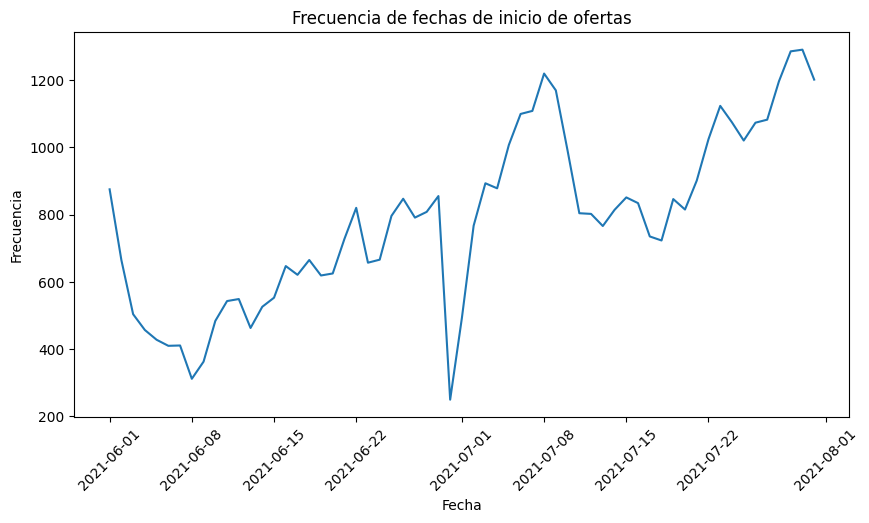

In [19]:
# Evaluar distribución de "OFFER_START_DATE"
plt.figure(figsize=(10,5))
plt.title("Frecuencia de fechas de inicio de ofertas")
plt.xlabel("Fecha")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
sns.lineplot(x=frec_offer_start_date.index, y=frec_offer_start_date.values);

**El 30 de julio del 2021 fue cuando más ofertas únicas comenzaron, seguido del 29, 8, 31 y 28 del mismo mes y año.**

**De las primeras 5 fechas más frecuentes, 4 fechas caen durante las vacaciones de invierno en Argentina, posiblemente apuntando a maximizar ventas a partir de ofertas, aprovechando las vacaciones.**

**Es relevante evaluar posteriormente, al analizar las otras variables, si las ventas efectivamente aumentan en el rango de las vacaciones de invierno, para poder confirmar el potencial comportamiento de los clientes, para finalmente recomendar campañas de marketing y ofertas durante esta época.**

**Las 5 fechas menos frecuentes suceden todas en junio, posiblemente indicando que los clientes prefieren comprar cerca de sus vacaciones.**

**Por otro lado, sería relevante evaluar otros meses del año, para tener un mejor entendimiento del comportamiento de compra de los clientes. Además, a la hora de realizar un modelo de Machine Learning, entrenado exclusivamente con estos datos, podría generalizar mal al sobreestimar la demanda en meses que estén fuera de vacaciones.**

**Además, al observar que las fechas con el menor inicio de ofertas ocurren en junio, indica la existencia de una oportunidad para intentar aumentar las ventas en junio, debido a la diferencia competitiva entre meses. Se podrían aumentar las ofertas para evaluar posteriormente la efectividad de ofrecer ofertas previas a las vacaciones. Es posible que si hay pocas ofertas, exista una relación con un comportamiento de los usuarios donde esperan los descuentos en julio.**

### "OFFER_START_DTTM"

**La columna "OFFER_START_DTTM" parece ser la columna original, idéntica a "OFFER_START_DATE" pero con el horario (timestamp) incluído. Permitiría analizar las horas en las cuales se lanzan más ofertas.**

In [20]:
df[["OFFER_START_DATE", "OFFER_START_DTTM"]]

,OFFER_START_DATE,OFFER_START_DTTM
0,2021-06-22,2021-06-22 16:00:00+00:00
1,2021-06-22,2021-06-22 13:00:00+00:00
2,2021-06-22,2021-06-22 07:00:00+00:00
3,2021-06-22,2021-06-22 19:00:00+00:00
4,2021-06-22,2021-06-22 13:00:00+00:00
...,...,...
48741,2021-06-19,2021-06-19 13:00:00+00:00
48742,2021-06-19,2021-06-19 13:00:00+00:00
48743,2021-06-19,2021-06-19 07:00:00+00:00
48744,2021-06-19,2021-06-19 13:00:00+00:00


**Se verifica que ambos campos sean iguales, exceptuando el horario, para confirmar que "OFFER_START_DATE" fue generado a partir de "OFFER_START_DTTM", y que no existan potenciales errores de typeo, en caso de venir de algún CRM o software similar.**

In [21]:
# Convertir columna "OFFER_START_DTTM" a tipo Datetime
df["OFFER_START_DTTM"] = pd.to_datetime(df["OFFER_START_DTTM"])

# Crear columna para verificación
df["OFFER_START_DTTM_DATE"] = df["OFFER_START_DTTM"].copy()

# Extraer fecha sin timestamp
df["OFFER_START_DTTM_DATE"] = df["OFFER_START_DTTM_DATE"].dt.date

# Verificar
df["OFFER_START_DTTM_DATE"].head(3)

0    2021-06-22
1    2021-06-22
2    2021-06-22
Name: OFFER_START_DTTM_DATE, dtype: object

In [22]:
# Evaluar si existen diferencias
(pd.to_datetime(df["OFFER_START_DATE"]) != df["OFFER_START_DTTM_DATE"]).any()

False

In [23]:
# Imprimir columnas
print(df.columns)

# Droppear columna adicional
df.drop(columns="OFFER_START_DTTM_DATE", inplace=True)

# Verificar
df.columns

Index(['OFFER_START_DATE', 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM',
       'OFFER_TYPE', 'INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END',
       'SOLD_AMOUNT', 'SOLD_QUANTITY', 'ORIGIN', 'SHIPPING_PAYMENT_TYPE',
       'DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID', 'OFFER_START_DTTM_DATE'],
      dtype='object')


Index(['OFFER_START_DATE', 'OFFER_START_DTTM', 'OFFER_FINISH_DTTM',
       'OFFER_TYPE', 'INVOLVED_STOCK', 'REMAINING_STOCK_AFTER_END',
       'SOLD_AMOUNT', 'SOLD_QUANTITY', 'ORIGIN', 'SHIPPING_PAYMENT_TYPE',
       'DOM_DOMAIN_AGG1', 'VERTICAL', 'DOMAIN_ID'],
      dtype='object')

**Debido a que el campo es exactamente igual a "OFFER_START_DATE", se creará un campo para evaluar posteriormente los horarios donde se publican las ofertas.**

**Se extrae exclusivamente la hora, ya que los minutos agregarían más granularidad innecesaria, generando 60 categorías adicionales (0 a 59), mientras que con las horas, existen 24 categorías (0 a 23).**

**Extraer el horario permitiría entender si hay más ofertas a la mañana, a la tarde o a la noche, además de horarios populares, para entender patrones.**

**Posteriormente sería interesante entender en qué horarios se vende más, para recomendar lanzar más campañas en esos horarios.**

In [24]:
# Crear columna con timestamp
df["OFFER_START_DTTM_H"] = df["OFFER_START_DTTM"].copy()
df["OFFER_START_DTTM_H"] = df["OFFER_START_DTTM_H"].dt.hour

# Verificar
df["OFFER_START_DTTM_H"].head(3)

0    16
1    13
2     7
Name: OFFER_START_DTTM_H, dtype: int32

In [25]:
# Cantidad de horarios en la columna
df["OFFER_START_DTTM_H"].nunique()

24

In [26]:
# Evaluar horarios más populares
frec_offer_start_h = df["OFFER_START_DTTM_H"].value_counts()
frec_offer_start_h

OFFER_START_DTTM_H
13    14103
19    12725
7     12367
12     2127
17     1308
11     1230
15     1166
14      939
16      786
10      375
18      314
20      105
9        79
8        53
1        52
21       41
22       18
6        10
3         8
2         7
23        4
0         1
5         1
4         1
Name: count, dtype: int64

**Se puede observar que los 3 horarios más populares son a las 13hs, 19hs y 7hs.**

**Esto se puede deber potencialmente a que el horario del almuerzo le da mayor libertad a los clientes y les permite navegar, ver ofertas, y comprar, por lo tanto, las ofertas relámpago apuntan a este horario.**

**A las 19hs, las ofertas apuntan a los clientes que salen de la jornada laboral o estudiantil, mientras que a las 7hs se pueden lanzar ofertas que apunten a usuarios que estén desayunando o se estén desplazando al trabajo, universidad o colegio, mientras revisan celular o la computadora.**

**Los horarios menos populares son a la noche tarde o a la madrugada, entre las 20 y 6hs, donde es racional estimar una actividad baja por parte de los usuarios, ya que seguramente se encuentren cenando o durmiendo.**

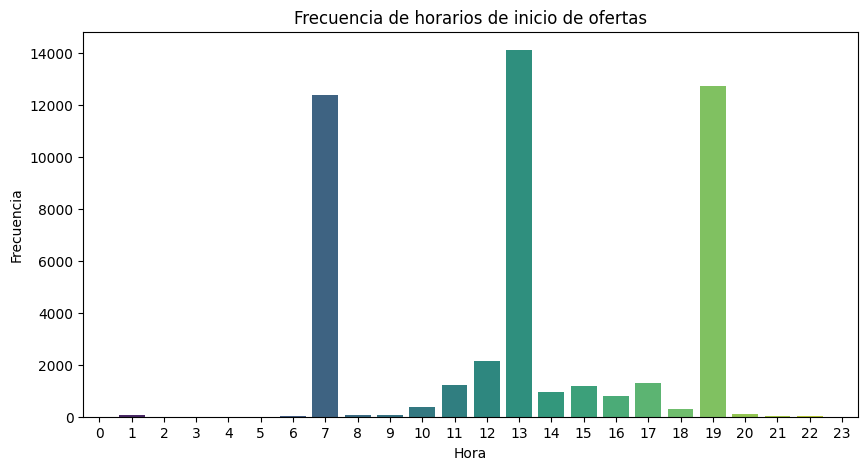

In [27]:
# Evaluar distribución de "OFFER_START_DTTM_H"
plt.figure(figsize=(10,5))
plt.title("Frecuencia de horarios de inicio de ofertas")
plt.xlabel("Hora")
plt.ylabel("Frecuencia")
sns.barplot(x=frec_offer_start_h.index, y=frec_offer_start_h.values, palette="viridis");

**El gráfico expone y apoya lo discutido anteriormente, sobre los picos de lanzamiento de ofertas a la mañana, mediodía y noche (7, 13 y 19hs), y demuestra de forma visual los horarios menos populares para ofrecer ofertas (entre las 20 y 6hs).**

### "OFFER_FINISH_DTTM"

**La columna "OFFER_FINISH_DTTM" permitiría analizar las horas en las cuales se terminan ofertas. Al contener tanto datos de las fechas como horarios, se pueden evaluar las fechas más populares, separado de los horarios más populares, para posteriormente entender el comportamiento de los usuarios.**

In [28]:
df["OFFER_FINISH_DTTM"].isna().any()

False

In [29]:
print(f"Valores únicos: {df["OFFER_FINISH_DTTM"].nunique()}") 
np.sort(df["OFFER_FINISH_DTTM"].unique())

Valores únicos: 7578


array(['2021-06-01 07:00:00+00:00', '2021-06-01 07:00:02+00:00',
       '2021-06-01 07:00:22+00:00', ..., '2021-08-01 01:00:33+00:00',
       '2021-08-01 01:00:34+00:00', '2021-08-01 03:00:00+00:00'],
      dtype=object)

In [30]:
# Verificar rango de fechas 
print("Fecha máxima") 
print(df["OFFER_FINISH_DTTM"].max()) 
print("\nFecha mínima") 
print(df["OFFER_FINISH_DTTM"].min())

Fecha máxima
2021-08-01 03:00:00+00:00

Fecha mínima
2021-06-01 07:00:00+00:00


**Se repite la misma lógica para con "OFFER_START_DTTM", las ofertas terminan en la ventana de tiempo de los 2 meses, junio y julio del 2021.**

**Debido a que la columna contiene tanto datos de fechas como de horarios, se crearán 2 columnas para separar y entender los patrones.**

In [31]:
# Castear a Datetime
df["OFFER_FINISH_DTTM"] = pd.to_datetime(df["OFFER_FINISH_DTTM"])

# Crear columnas para fechas y horarios
df["OFFER_FINISH_DATE"] = df["OFFER_FINISH_DTTM"].dt.date
df["OFFER_FINISH_HOUR"] = df["OFFER_FINISH_DTTM"].dt.hour

# Verificar
df[["OFFER_FINISH_DTTM", "OFFER_FINISH_DATE", "OFFER_FINISH_HOUR"]].head(3)

,OFFER_FINISH_DTTM,OFFER_FINISH_DATE,OFFER_FINISH_HOUR
0,2021-06-22 23:02:43+00:00,2021-06-22,23
1,2021-06-22 19:00:02+00:00,2021-06-22,19
2,2021-06-22 13:00:01+00:00,2021-06-22,13


In [32]:
# Observar frecuencia de fechas
frec_offer_finish_date = df["OFFER_FINISH_DATE"].value_counts()
frec_offer_finish_date

OFFER_FINISH_DATE
2021-07-29    1270
2021-07-30    1269
2021-07-31    1220
2021-07-09    1181
2021-07-28    1172
              ... 
2021-06-06     395
2021-07-01     347
2021-06-09     344
2021-06-08     332
2021-08-01     301
Name: count, Length: 62, dtype: int64

In [33]:
df["OFFER_FINISH_DATE"].nunique()

62

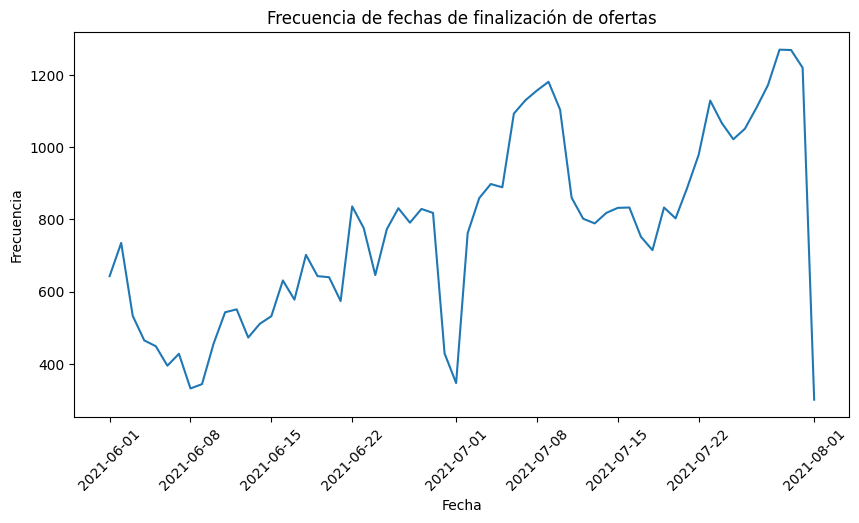

In [34]:
# Evaluar distribución de "OFFER_FINISH_DATE"
plt.figure(figsize=(10,5))
plt.title("Frecuencia de fechas de finalización de ofertas")
plt.xlabel("Fecha")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
sns.lineplot(x=frec_offer_finish_date.index, y=frec_offer_finish_date.values);

**El gráfico muestra picos de actividad hacia finales de julio de 2021, coincidiendo con la lógica discutida con los inicios de "OFFER_START_DTTM", razonable al considerar que son ofertas relámpago. Los máximos los días se encuentran los días 29, 30 y 31 de julio, con una caída abrupta el 1 de agosto de 2021, el final de la ventana.**

**Los días con más finalizaciones de ofertas podrían haber impulsado picos de ventas debido a promociones o campañas de fin de mes. Si se observa un aumento significativo en las ventas en estos días, se podría inferir que las ofertas fueron efectivas.**

In [35]:
# Cantidad de horarios en la columna
df["OFFER_FINISH_HOUR"].nunique()

24

In [36]:
# Evaluar horarios más populares
frec_offer_finish_h = df["OFFER_FINISH_HOUR"].value_counts()
frec_offer_finish_h

OFFER_FINISH_HOUR
19    12256
13    11564
1     10815
20     2573
21     1502
23     1361
0      1361
22     1181
18     1116
7      1093
17      529
12      406
15      404
16      381
11      301
14      280
10      190
2       160
3       137
9       118
4        48
8        28
5        14
6         2
Name: count, dtype: int64

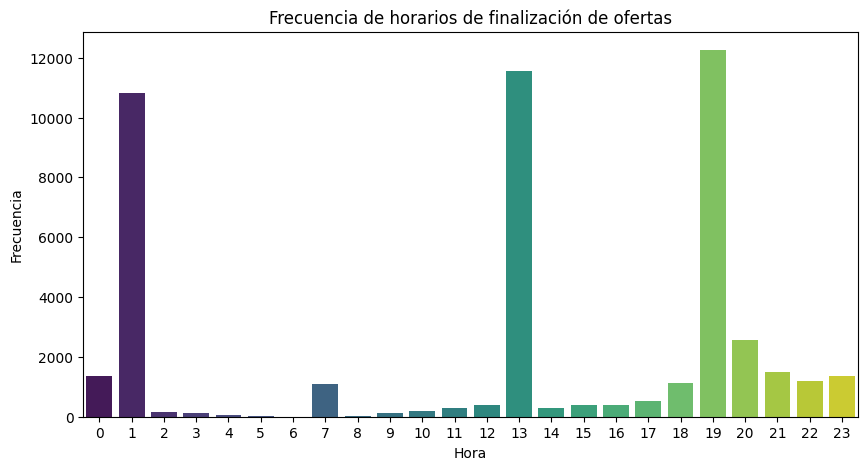

In [37]:
# Evaluar distribución de "OFFER_FINISH_HOUR"
plt.figure(figsize=(10,5))
plt.title("Frecuencia de horarios de finalización de ofertas")
plt.xlabel("Hora")
plt.ylabel("Frecuencia")
sns.barplot(x=frec_offer_finish_h.index, y=frec_offer_finish_h.values, palette="viridis");

**Los 2 picos máximos suceden a las 19hs y 13hs, coincidiendo con la lógica del inicio de ofertas, posiblemente horarios ubicados para generar cierta sensación de urgencia en los clientes, para tratar de influenciar una compra en este tipo que tienen libertad para conectarse a ver ofertas, redes sociales, etc.**

**Sorpresivamente, el otro pico es a la 1 de la mañana, posiblemente mostrando finalizaciones automáticas de ofertas**

**Al analizar la definición de MercadoLibre de ofertas relámpago, ofertas de productos con stock limitado durante 6 horas, ideales para liquidar stock rápidamente, se puede entender que las ofertas que finalizan a la 1 de la mañana son las que previamente comenzaron a las 19, las que terminan a las 19hs comenzaron a las 13hs, mientras que las que terminan a las 13hs, comenzaron a las 7hs, coincidiendo con los picos de inicio de las ofertas, un comportamiento lógico.**

### "OFFER_TYPE"

In [38]:
df["OFFER_TYPE"].value_counts()

OFFER_TYPE
lightning_deal    47820
Name: count, dtype: int64

**La columna "OFFER_TYPE" contiene solamente el valor "lightning_deal", también conocido como oférta relámpago. Posiblemente este valor haya ayudado a extraer esta muestra de una base de datos más aplia, junto con el rango de tiempo.**

**En este dataset, esta columna con un solo dato no aportaría valor para un modelo de Machine Learning y se droppearía o ignoraría.**

### "INVOLVED_STOCK"

**La columna "INVOLVED_STOCK" indica la cantidad de unidades (en integers) que el producto en la oferta relámpago tiene disponible para este tipo de oferta.**

**Sería interesante entender si la cantidad de unidades disponible influye en el comportamiento de los clientes a la hora de comprar, en el caso de que una oferta al tener una menor cantidad de unidades disponibles, genere cierta sensación de urgencia en el usuario y lo empuje a comprar.**

In [39]:
frec_involved_stock = df["INVOLVED_STOCK"].value_counts(dropna=False)
frec_involved_stock

INVOLVED_STOCK
5      17868
15     16676
10      3198
20       784
8        569
       ...  
165        1
599        1
699        1
675        1
436        1
Name: count, Length: 505, dtype: int64

In [40]:
df["INVOLVED_STOCK"].nunique()

505

In [41]:
# Filtrar por cantidad de unidades que ocurran por lo menos 30 veces, para poder visualizar en el gráfico
umbral = 30
frec_involved_stock_umbral = frec_involved_stock[frec_involved_stock >= umbral]

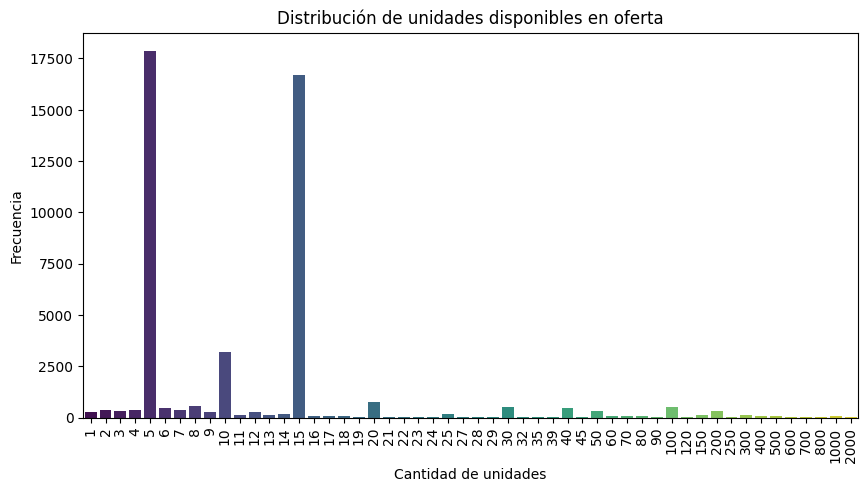

In [42]:
# Graficar distribución de "INVOLVED_STOCK"
plt.figure(figsize=(10,5))
plt.title("Distribución de unidades disponibles en oferta")
plt.xlabel("Cantidad de unidades")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
sns.barplot(x=frec_involved_stock_umbral.index, y=frec_involved_stock_umbral.values, palette="viridis");

**Los picos están en 5 y 15 unidades, seguidos de 10 unidades, con una diferencia bastante significativa. Esto podría indicar que es frecuente cargar una cantidad de unidades que sean múltiplos de 5, en ofertas relámpago.**

**Habría que investigarlo, pero es posible que sea una estrategia comercial para simplificar compras, al tratar de incentivar compras en packs o conjuntos de 5, 10 o 15 unidades. Además, es posible que estas ofertas sean por volumen.**

**Por otro lado, hay muchos valores extremos (de unidades) con bajas frecuencias. Al tener frecuencias muy bajas, son casos extremos aislados, que dificultaron la visualización, por lo tanto se tuvo que fijar un umbral en la frecuencia por cada valor en la cantidad de unidades, en 30.**

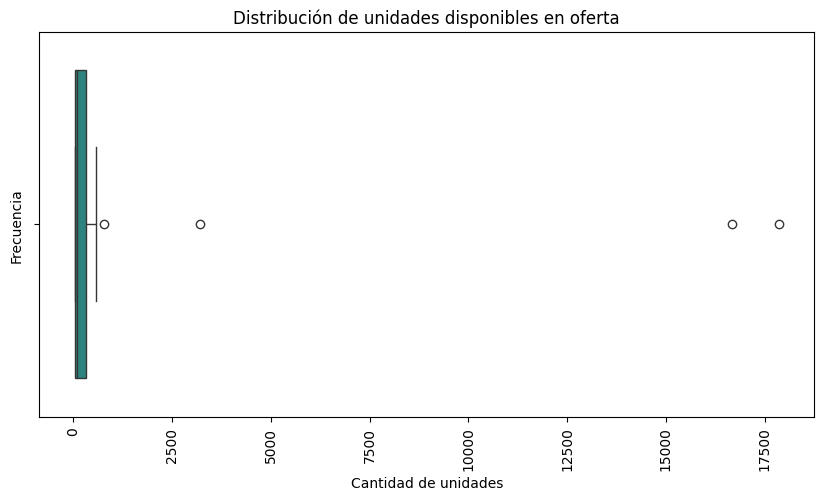

In [43]:
# Observar outliers
plt.figure(figsize=(10,5))
plt.title("Distribución de unidades disponibles en oferta")
plt.xlabel("Cantidad de unidades")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
sns.boxplot(x=frec_involved_stock_umbral, palette="viridis");

**El boxplot refuerza el concepto de que hay una cantidad de outliers en términos de cantidades de unidades. Es posible que en muchos casos se trate de error de typeo, o una apuesta masiva a la venta de alguna oferta durante la época de vacaciones de invierno.**

In [44]:
# Observar estadísticas descriptivas
involved_stock_estadisticas = df["INVOLVED_STOCK"].describe()
involved_stock_estadisticas

count    47820.000000
mean        35.153095
std        208.339376
min          1.000000
25%          5.000000
50%         10.000000
75%         15.000000
max       9000.000000
Name: INVOLVED_STOCK, dtype: float64

**Se puede observar que en términos de stock, la media es de aproximadamente 35, mientras que el Q1, la mediana y el Q3 son de 5, 10 y 15 unidades respectivamente, los picos, reforzando el concepto que la media está influenciada por los outliers en términos de stock.** 

In [45]:
# Calcular rango intercuartil
iqr_involved_stock = involved_stock_estadisticas.loc["75%"] - involved_stock_estadisticas.loc["25%"]

# Calcular punto de corte superior para outliers
punto_corte_superior_involved_stock = involved_stock_estadisticas.loc["75%"] + iqr_involved_stock * 1.5

# Calcular punto de corte inferior para outliers
punto_corte_inferior_involved_stock = involved_stock_estadisticas.loc["25%"] - iqr_involved_stock * 1.5

# Imprimir rango intercuartil y punto de corte superior e inferior
print(f"Rango intercuartil: {iqr_involved_stock:.2f}")
print(f"Punto de corte superior para outliers: {punto_corte_superior_involved_stock:.2f}")
print(f"Punto de corte inferior para outliers: {punto_corte_inferior_involved_stock:.2f}")

Rango intercuartil: 10.00
Punto de corte superior para outliers: 30.00
Punto de corte inferior para outliers: -10.00


**Se puede observar que el stock a partir de las 30 unidades por oferta relámpago es considerado un valor extremo.**

**Siguiendo la lógica de las ofertas relámpago, tiene sentido que estén involucrados una cantidad acotada de unidades, ya que el objetivo de la oferta es liquidar stock en 6 horas, un rango relativamente corto de tiempo.**

### "REMAINING_STOCK_AFTER_END"

La columna "REMAINING_STOCK_AFTER_END" indica la cantidad de unidades (en integers) que el producto en la oferta relámpago tiene como remanente luego que finalice la misma.

**Otra posible interpretación, a investigar, sería que sea el stock luego de la compra, por lo que sería el resultado de la resta entre "INVOLVED_STOCK" y "SOLD_QUANTITY".**

In [46]:
frec_remaining_stock = df["REMAINING_STOCK_AFTER_END"].value_counts()
frec_remaining_stock

REMAINING_STOCK_AFTER_END
5       9666
15      7010
4       3673
0       2961
14      2750
        ... 
853        1
1459       1
220        1
3918       1
1730       1
Name: count, Length: 801, dtype: int64

In [47]:
df["REMAINING_STOCK_AFTER_END"].nunique()

801

In [48]:
df["REMAINING_STOCK_AFTER_END"].sort_values()

32275    -192
11448     -81
41045     -70
45648     -41
33627     -40
         ... 
23545    5986
8344     6917
11380    7035
10525    7460
16983    8635
Name: REMAINING_STOCK_AFTER_END, Length: 47820, dtype: int64

**"REMAINING_STOCK_AFTER_END" tiene valores negativos y valores iguales a 0. Sería relevante investigar los casos negativos.**

**Los valores negativos pueden indicar una sobreventa, donde se vendieron más unidades de las disponibles originalmente.**

**Los valores iguales a 0 pueden indicar que todas las unidades disponibles se vendieron.**

**Otros valores podrían indicar que se vendieron unidades o no.**

In [49]:
# Investigar cantidad de casos con "REMAINING_STOCK_AFTER_END" con valores negativos
casos_negativos_remaining_stock = df[df["REMAINING_STOCK_AFTER_END"] < 0]
cant_casos_negativos_remaining_stock = len(casos_negativos_remaining_stock)
print(f"Cantidad de casos negativos: {cant_casos_negativos_remaining_stock}")
print(f"Porcentaje de casos negativos: {(cant_casos_negativos_remaining_stock / df.shape[0] * 100):.2f}%")

# Observar ejemplos
casos_negativos_remaining_stock.head(3)

Cantidad de casos negativos: 1263
Porcentaje de casos negativos: 2.64%


,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,OFFER_START_DTTM_H,OFFER_FINISH_DATE,OFFER_FINISH_HOUR
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS,16,2021-06-22,23
7,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:39+00:00,lightning_deal,10,-1,103.03,11.0,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES,19,2021-06-22,23
8,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:32+00:00,lightning_deal,10,-1,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES,19,2021-06-22,23


**Se puede verificar que "REMAINING_STOCK_AFTER_END" es el resultado de "INVOLVED_STOCK" - "SOLD_QUANTITY".**

**No debería ser posible tener stock negativo, posiblemente sea un error de lógica tanto en que "SOLD_QUANTITY" pueda ser mayor a "INVOLVED_STOCK", y que "REMAINING_STOCK_AFTER_END" acepte valores negativos.**

In [50]:
# Filtrar por cantidad de unidades que ocurran por lo menos 30 veces, para poder visualizar en el gráfico
umbral_remaining = 30
frec_remaining_stock_umbral = frec_remaining_stock[frec_remaining_stock >= umbral_remaining]

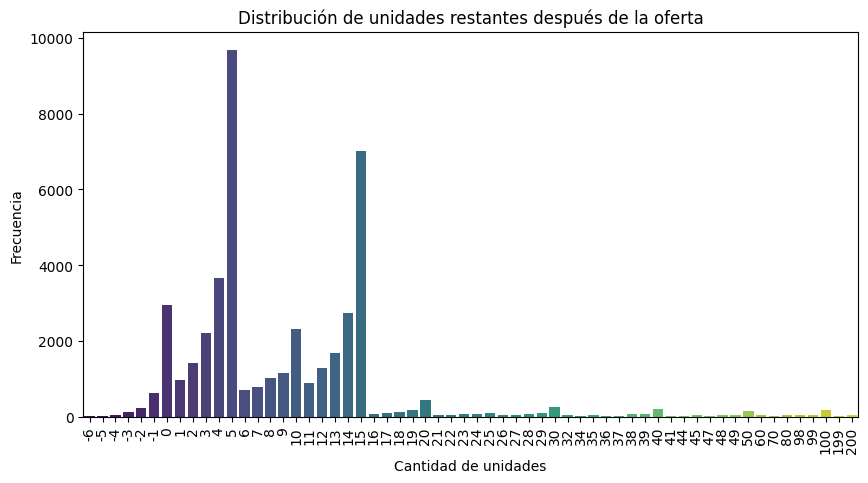

In [51]:
# Distribución de "REMAINING_STOCK_AFTER_END"
plt.figure(figsize=(10,5))
plt.title("Distribución de unidades restantes después de la oferta")
plt.xlabel("Cantidad de unidades")
plt.ylabel("Frecuencia")
plt.xticks(rotation=90)
sns.barplot(x=frec_remaining_stock_umbral.index, y=frec_remaining_stock_umbral.values, palette="viridis");

**Al interpretar los resultados del value_counts y del gráfico, se puede observar picos en 5 y 15 unidades, seguido de 4 unidades, con bastante diferencia.**

**Los picos de 5 y 15 unidades coinciden en la lógica con los picos de la columna "INVOLVED_STOCK", indicando una cantidad significativa de ofertas sin vender.**

**Los valores negativos indican una falla de lógica en las ofertas, como fue discutido previamente.**

**Además, la cantidad de 0s indica que esa oferta se quedó sin stock y fue exitosa, un dato relevante para analizar los parámetros de la oferta, para tratar de replicarla con otros productos y ofertas en el futuro.**

In [52]:
# Observar estadísticas descriptivas
remaining_stock_estadisticas = df["REMAINING_STOCK_AFTER_END"].describe()
remaining_stock_estadisticas

count    47820.000000
mean        30.641029
std        197.270692
min       -192.000000
25%          4.000000
50%          8.000000
75%         15.000000
max       8635.000000
Name: REMAINING_STOCK_AFTER_END, dtype: float64

**Se puede observar que la media es de aproximadamente 30 unidades, mientras que el Q2, mediana y Q3 son 4, 8 y 15 respectivamente, indicando la presencia de outliers que mueven la media para la derecha.**

In [53]:
# Calcular rango intercuartil
iqr_remaining_stock = remaining_stock_estadisticas.loc["75%"] - remaining_stock_estadisticas.loc["25%"]

# Calcular punto de corte superior para outliers
punto_corte_superior_remaining_stock = remaining_stock_estadisticas.loc["75%"] + iqr_remaining_stock * 1.5

# Calcular punto de corte inferior para outliers
punto_corte_inferior_remaining_stock = remaining_stock_estadisticas.loc["25%"] - iqr_remaining_stock * 1.5

# Imprimir rango intercuartil y punto de corte superior e inferior
print(f"Rango intercuartil: {iqr_remaining_stock:.2f}")
print(f"Punto de corte superior para outliers: {punto_corte_superior_remaining_stock:.2f}")
print(f"Punto de corte inferior para outliers: {punto_corte_inferior_remaining_stock:.2f}")

Rango intercuartil: 11.00
Punto de corte superior para outliers: 31.50
Punto de corte inferior para outliers: -12.50


Se puede observar que el stock a partir de las 32 unidades aproximadamente por oferta relámpago es considerado un valor extremo.

### "SOLD_AMOUNT"

**La columna "SOLD_AMOUNT" contiene valores flotantes que seguramente hagan referencia al valor generado en la oferta.**

In [54]:
frec_sold_amount = df["SOLD_AMOUNT"].value_counts(dropna=False)
frec_sold_amount

SOLD_AMOUNT
NaN      23272
4.25        39
2.89        31
5.71        30
5.68        29
         ...  
78.47        1
58.54        1
86.43        1
30.64        1
70.14        1
Name: count, Length: 7604, dtype: int64

In [55]:
cant_nulos_sold_amount = df["SOLD_AMOUNT"].isna().sum()
porc_nulos_sold_amount = round(cant_nulos_sold_amount / df.shape[0] * 100, 2)
porc_nulos_sold_amount

48.67

**La columna "SOLD_AMOUNT" contiene casi un 49% de nulos, sugiriendo que casi la mitad de las ofertas no fueron concretadas. Esta lógica se podría extender a "SOLD_QUANTITY", una columna estrechamente relacionada.**

**Otras explicaciones podrían incluir errores en carga de datos, transacciones incompletas que registran cantidad pero no monto, problemas en la sincronización entre sistemas, devoluciones, promociones 2x1, entre otras potenciales causas.**

In [56]:
# Estadísticas descriptivas
sold_amount_estadisticas = df["SOLD_AMOUNT"].describe()
sold_amount_estadisticas

count    24548.000000
mean        51.177417
std        175.319125
min          0.280000
25%          5.730000
50%         12.415000
75%         30.882500
max       4836.570000
Name: SOLD_AMOUNT, dtype: float64

In [57]:
# Calcular rango intercuartil
iqr_sold_amount = sold_amount_estadisticas.loc["75%"] - sold_amount_estadisticas.loc["25%"]

# Calcular punto de corte superior para outliers
punto_corte_superior_sold_amount = sold_amount_estadisticas.loc["75%"] + iqr_sold_amount * 1.5

# Calcular punto de corte inferior para outliers
punto_corte_inferior_sold_amount = sold_amount_estadisticas.loc["25%"] - iqr_sold_amount * 1.5

# Imprimir rango intercuartil y punto de corte superior e inferior
print(f"Rango intercuartil: {iqr_sold_amount:.2f}")
print(f"Punto de corte superior para outliers: {punto_corte_superior_sold_amount:.2f}")
print(f"Punto de corte inferior para outliers: {punto_corte_inferior_sold_amount:.2f}")

Rango intercuartil: 25.15
Punto de corte superior para outliers: 68.61
Punto de corte inferior para outliers: -32.00


In [58]:
# Excluir valores superiores al punto de corte superior
sold_amount_sin_outliers = df[df["SOLD_AMOUNT"] < punto_corte_superior_sold_amount]

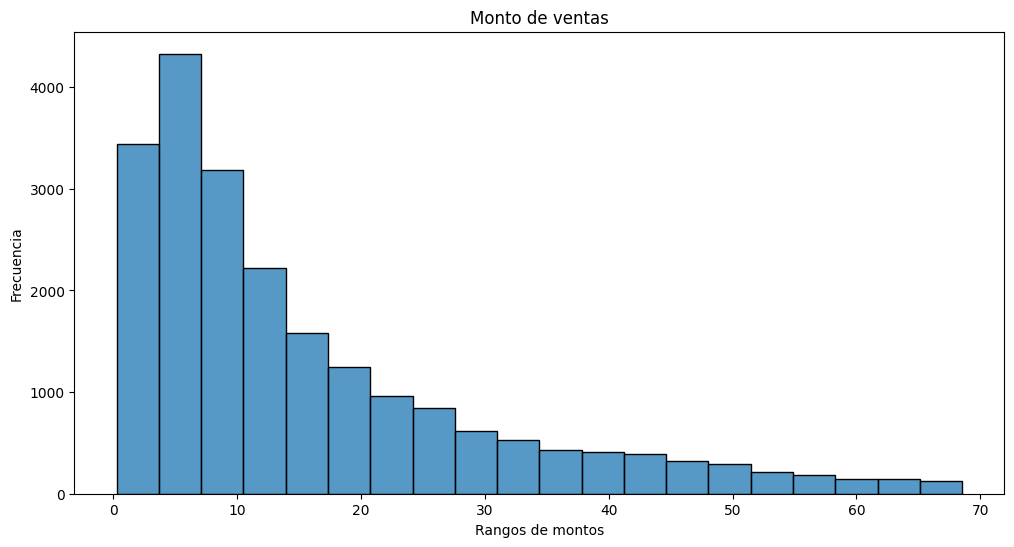

In [59]:
# Graficar sold_amount en bins sin nulos
plt.figure(figsize=(12, 6))
sns.histplot(sold_amount_sin_outliers["SOLD_AMOUNT"], bins=20, palette="viridis")
plt.title("Monto de ventas")
plt.xlabel("Rangos de montos")
plt.ylabel("Frecuencia");

**La columna parece ser el precio por oferta por unidad, debido a los montos observados. Luego de eliminar los outliers, la distribución es sesgada a la derecha, típico en productos mayoritariamente económicos.** 

**La cola larga muestra que existen productos más caros, pero no es la mayoría.**

**El pico se ve aproximadamente a los $5, indicando productos económicos de alta rotación.**

### "SOLD_QUANTITY"

**La columna "SOLD_QUANTITY" contiene la cantidad de unidades vendidas por oferta.**

In [60]:
frec_sold_quantity = df["SOLD_QUANTITY"].value_counts(dropna=False)
frec_sold_quantity

SOLD_QUANTITY
NaN      23272
1.0       7432
2.0       4203
3.0       2546
5.0       2142
         ...  
770.0        1
576.0        1
676.0        1
388.0        1
234.0        1
Name: count, Length: 374, dtype: int64

In [61]:
nulos_sold_quantity = df["SOLD_QUANTITY"].isna().sum()
porc_nulos_sold_quantity = round(nulos_sold_quantity / df.shape[0] * 100, 2)
porc_nulos_sold_quantity

48.67

**Se puede observar que esta columna contiene un 48.67% de nulos, exactamente igual que la columna de "SOLD_AMOUNT". Esto parecería indicar que las ofertas no concretadas no generaron unidades vendidas, indicando que la oferta no fue exitosa, y generando nulos en la columna.**

In [62]:
df["SOLD_QUANTITY"].nunique()

373

**373 cantidades únicas.**

In [63]:
# Estadísticas descriptivas
sold_quantity_estadisticas = df["SOLD_QUANTITY"].describe()
sold_quantity_estadisticas

count    24548.000000
mean        10.861455
std         45.502831
min          1.000000
25%          1.000000
50%          3.000000
75%          6.000000
max       1646.000000
Name: SOLD_QUANTITY, dtype: float64

In [64]:
# Calcular rango intercuartil
iqr_sold_quantity = sold_quantity_estadisticas.loc["75%"] - sold_quantity_estadisticas.loc["25%"]

# Calcular punto de corte superior para outliers
punto_corte_superior_sold_quantity = sold_quantity_estadisticas.loc["75%"] + iqr_sold_quantity * 1.5

# Calcular punto de corte inferior para outliers
punto_corte_inferior_sold_quantity = sold_quantity_estadisticas.loc["25%"] - iqr_sold_quantity * 1.5

# Imprimir rango intercuartil y punto de corte superior e inferior
print(f"Rango intercuartil: {iqr_sold_quantity:.2f}")
print(f"Punto de corte superior para outliers: {punto_corte_superior_sold_quantity:.2f}")
print(f"Punto de corte inferior para outliers: {punto_corte_inferior_sold_quantity:.2f}")

Rango intercuartil: 5.00
Punto de corte superior para outliers: 13.50
Punto de corte inferior para outliers: -6.50


In [65]:
# Excluir valores superiores al punto de corte superior
sold_quantity_sin_outliers = df[df["SOLD_QUANTITY"] < punto_corte_superior_sold_quantity]

In [66]:
frec_sold_quantity_sin_outliers = sold_quantity_sin_outliers["SOLD_QUANTITY"].value_counts()

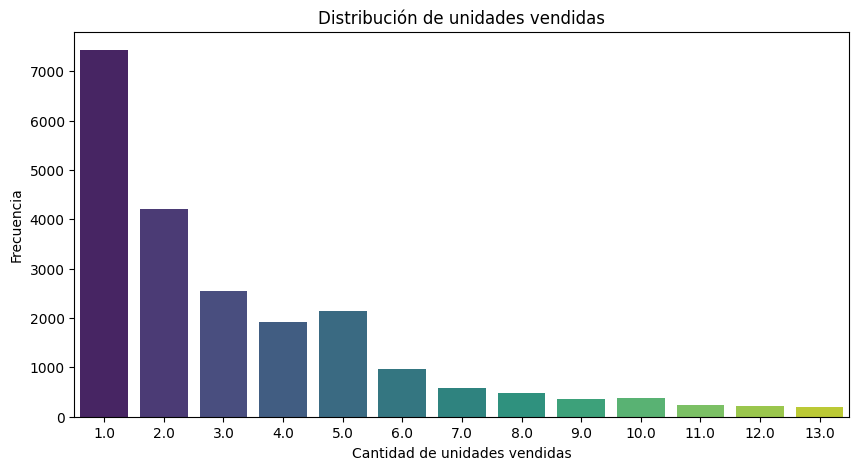

In [67]:
# Distribución de "SOLD_QUANTITY"
plt.figure(figsize=(10,5))
plt.title("Distribución de unidades vendidas")
plt.xlabel("Cantidad de unidades vendidas")
plt.ylabel("Frecuencia")
sns.barplot(x=frec_sold_quantity_sin_outliers.dropna().index, y=frec_sold_quantity_sin_outliers.dropna().values, palette="viridis");

**La mayoría de las ventas se concentran en cantidades pequeñas. La cantidad de 1 unidad es la más frecuente con 7432 registros, seguida de 2 y 3 unidades con 4203 y 2546 registros, respectivamente. A medida que aumenta la cantidad vendida, la frecuencia disminuye progresivamente, indicando una distribución sesgada a la derecha.**

**La alta frecuencia en los valores bajos sugiere que los clientes tienden a realizar compras de pocas unidades por transacción. Esto puede ser común en productos de consumo cotidiano.**

**A partir de 5 unidades (2142 registros), la frecuencia muestra una caída progresiva, indicando que las compras más grandes son menos comunes.**

**Se podrían explorar oportunidades como ventas múltiples, ya que hay una frecuencia significativa de ventas de 2 a 5 unidades, por lo tanto se podría agregar una promo de 3x2.**

**Además, se podrían analizar posteriormente las categorías de productos asociadas a estas cantidades para segmentar clientes de forma más precisa.**

### "ORIGIN"

**La columna "ORIGIN" solamente tiene el string "A" o valores nulos. Posiblemente indique algún tipo de orígen de dónde se extrajeron estos datos, o alguna condición para generar el dataset. Solo con los datos de esta columna, no es posible realizar un análisis extenso.**

In [68]:
df["ORIGIN"].value_counts(dropna=False)

ORIGIN
NaN    36975
A      10845
Name: count, dtype: int64

### "SHIPPING_PAYMENT_TYPE"

**La columna "SHIPPING_PAYMENT_TYPE" indica el tipo de envío.**

In [69]:
df["SHIPPING_PAYMENT_TYPE"].value_counts(dropna=False)

SHIPPING_PAYMENT_TYPE
free_shipping    25995
none             21825
Name: count, dtype: int64

**Se puede observar que la columna de envíos contiene 2 opciones, envío gratuito o sin. Algunas ofertas probablemente contengan envío gratuito por default, mientras que otras pueden tener la opción si el cliente paga con algún tipo de tarjeta o de banco en particular, u otra condición.**

### "DOM_DOMAIN_AGG1"

**La columna "DOM_DOMAIN_AGG1" contiene categorías de los productos de las diferentes ofertas.**

In [70]:
df["DOM_DOMAIN_AGG1"].nunique()

36

In [71]:
frec_dom_domain_agg1 = df["DOM_DOMAIN_AGG1"].value_counts(dropna=False)
frec_dom_domain_agg1

DOM_DOMAIN_AGG1
HOME&DECOR                      6637
APPAREL ACCESORIES              4315
APPAREL                         3814
COMPUTERS                       3661
SPORTS                          3263
PHARMACEUTICS                   3014
PERSONAL CARE                   2960
ELECTRONICS                     2922
MOBILE                          1790
AUTOPARTS                       1691
FOOTWEAR                        1482
TOOLS AND CONSTRUCTION          1457
TOYS AND GAMES                  1375
STATIONARY                      1246
INDUSTRY                        1162
BEAUTY EQUIPMENT                1094
FOODS                            847
PERSONAL HYGIENE                 820
BABY                             765
MOTOPARTS                        631
BOOKS, MULTIMEDIA & OTHER E!     474
PETS FOOD                        447
PARTY                            394
CLEANING                         356
SECURITY                         320
PET PRODUCTS                     254
SUPLEMENTS            

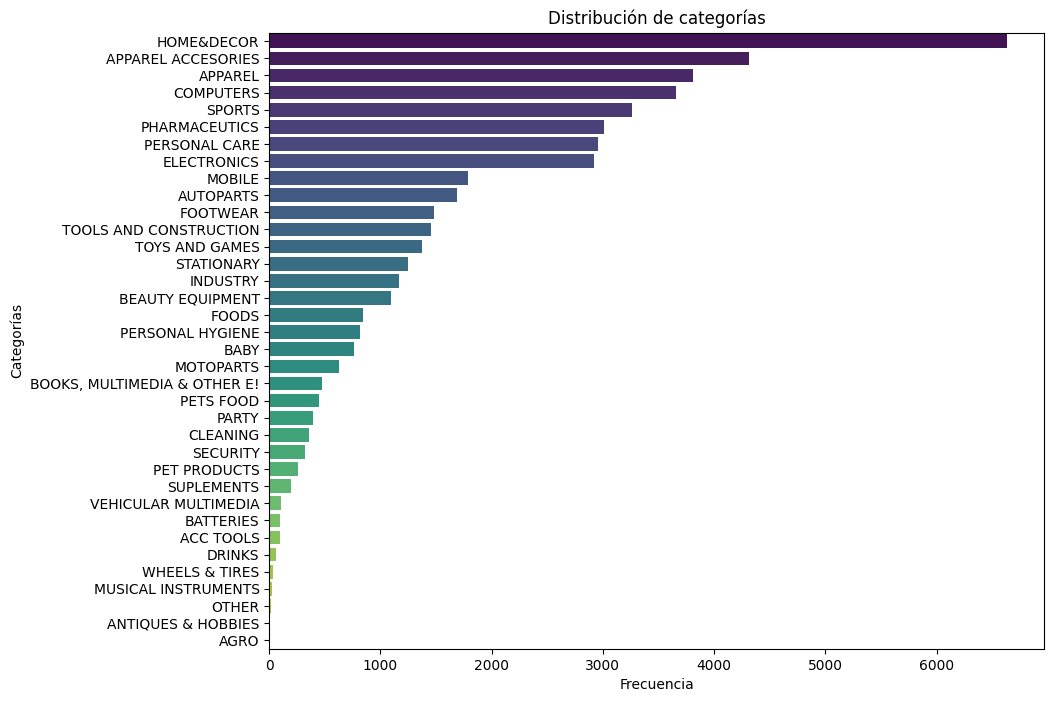

In [72]:
# Distribución de "DOM_DOMAIN_AGG1"
plt.figure(figsize=(10,8))
plt.title("Distribución de categorías")
plt.ylabel("Categorías")
plt.xlabel("Frecuencia")
sns.barplot(y=frec_dom_domain_agg1.index, x=frec_dom_domain_agg1.values, palette="viridis");

**Hay una clara dominancia de la categoría HOME&DECOR (6637 registros), seguida por APPAREL ACCESORIES (4315 registros) y APPAREL (3814 registros).**

**La categoría AGRO tiene solo 1 registro, mientras que ANTIQUES & HOBBIES tiene 5 registros, mostrando una distribución altamente desbalanceada.**

**Las primeras 5 categorías (HOME&DECOR, APPAREL ACCESORIES, APPAREL, COMPUTERS, SPORTS) concentran una gran parte de los registros.**

**Se recomienza concentrarse en campañas en las categorías líderes (HOME&DECOR y APPAREL).**

**Se podría explorar categorías como FOODS, BEAUTY EQUIPMENT y SPORTS que muestran una frecuencia intermedia, para una estrategia de expansión de productos**.

**Además, se sugiere revisar las categorías con menos de 100 registros (ACC TOOLS, VEHICULAR MULTIMEDIA, BATTERIES) para evaluar si es tiene sentido generar ofertas.**

### "VERTICAL"

**La columna "VERTICAL" parece representar categorías de los productos ofrecidos en las ofertas.**

In [73]:
frec_vertical = df["VERTICAL"].value_counts(dropna=False)
frec_vertical

VERTICAL
APP & SPORTS       13065
HOME & INDUSTRY    10822
CE                  8373
BEAUTY & HEALTH     7068
CPG                 2631
ACC                 2553
T & B               2534
ENTERTAINMENT        498
OTHERS               276
Name: count, dtype: int64

**Una posible interpretación de las categorías:**
1. **APP & SPORTS**: artículos deportivos
2. **HOME & INDUSTRY**: productos para el hogar y artículos industriales
3. **CE**: Consumer Electronics, o electrónicos de consumo, incluye teléfonos, televisores, computadoras, auriculares, etc
4. **BEAUTY & HEALTH**: productos relacionados a salud y belleza
5. **CPG**: Consumer Packaged Goods, bienes de consumo envasados, incluye alimentos como comidas congeladas, bebidas, cereales, productos de limpieza, etc.
6. **ACC**: Accesorios.
7. **T & B**: Toys & Baby, productos y juguetes para bebés y niños pequeños 
8. **ENTERTAINMENT**: productos relacionados con el entretenimiento, como consolas de videojuegos, juegos, etc
9. **OTHERS**: otros productos que no encajan en las otras categorías

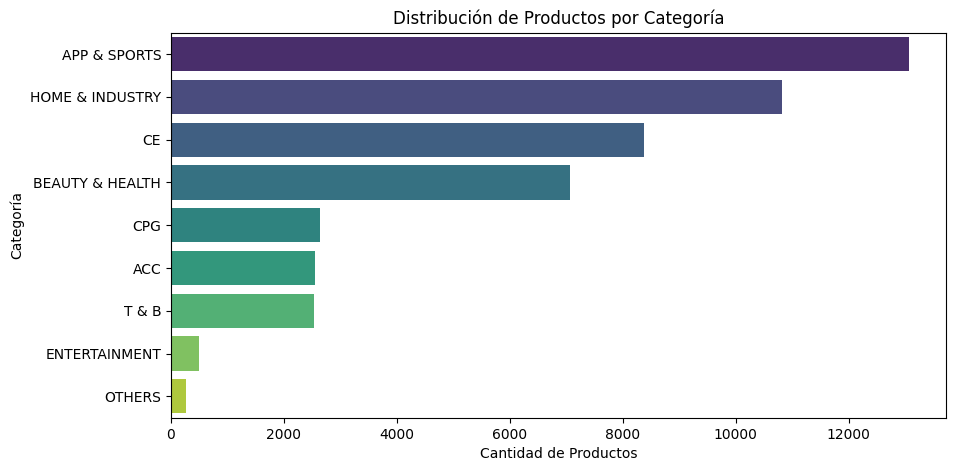

In [74]:
# Gráfico de frecuencias de "VERTICAL"
plt.figure(figsize=(10,5))
sns.barplot(x=frec_vertical.values, y=frec_vertical.index, palette="viridis")
plt.title("Distribución de Productos por Categoría")
plt.xlabel("Cantidad de Productos")
plt.ylabel("Categoría");

**Las categorías APP & SPORTS, HOME & INDUSTRY, CE y BEAUTY & HEALTH juntas concentran más del 70% de los registros, indicando que estas son las categorías principales.**

**Las demás parecen tener menor importancia relativa, siendo candidatas para ser agrupadas bajo un “OTHERS” extendido en futuros análisis.**

**Se recomendaría concentrarse en las 4 principales categorías para campañas de marketing.**

**Por otro lado, se recomendaría investigar si las categorías con menor frecuencia (como ENTERTAINMENT y OTHERS) representan oportunidades de crecimiento.**

### "DOMAIN_ID"

**La columna "DOMAIN_ID" contiene categorías específicas de productos dentro de una jerarquía más detallada que VERTICAL, pero menos específica que un título único de producto.**

In [75]:
df["DOMAIN_ID"].isna().any()

False

In [76]:
df["DOMAIN_ID"].nunique()

1266

**Esta categoría contiene 1266 valores únicos.**

In [77]:
df["DOMAIN_ID"].value_counts()[:10]

DOMAIN_ID
MLM-SURGICAL_AND_INDUSTRIAL_MASKS    1757
MLM-HEADPHONES                        750
MLM-LED_STRIPS                        512
MLM-SUNGLASSES                        455
MLM-VEHICLE_LED_BULBS                 454
MLM-SNEAKERS                          443
MLM-WRISTWATCHES                      423
MLM-TABLE_AND_DESK_LAMPS              409
MLM-MARKERS_AND_HIGHLIGHTERS          397
MLM-PANTS                             383
Name: count, dtype: int64

**La estructura de los valores sugiere que está ordenado por un tipo de marketplace, quizás México, por MLM (Mercado Libre México).**

**Debido a la extensa cantidad de tipos de productos en esta columna, se selecciona los top 20 para graficar.**

In [78]:
frec_domain_id = df["DOMAIN_ID"].value_counts()[:20]
frec_domain_id

DOMAIN_ID
MLM-SURGICAL_AND_INDUSTRIAL_MASKS    1757
MLM-HEADPHONES                        750
MLM-LED_STRIPS                        512
MLM-SUNGLASSES                        455
MLM-VEHICLE_LED_BULBS                 454
MLM-SNEAKERS                          443
MLM-WRISTWATCHES                      423
MLM-TABLE_AND_DESK_LAMPS              409
MLM-MARKERS_AND_HIGHLIGHTERS          397
MLM-PANTS                             383
MLM-SMARTWATCHES                      377
MLM-JACKETS_AND_COATS                 375
MLM-CELLPHONE_COVERS                  366
MLM-T_SHIRTS                          362
MLM-WALLETS                           358
MLM-RESISTANCE_BANDS                  355
MLM-THERMOSES                         345
MLM-COMPUTER_MICE                     335
MLM-WALL_AND_CEILING_LIGHTS           331
MLM-BACKPACKS                         327
Name: count, dtype: int64

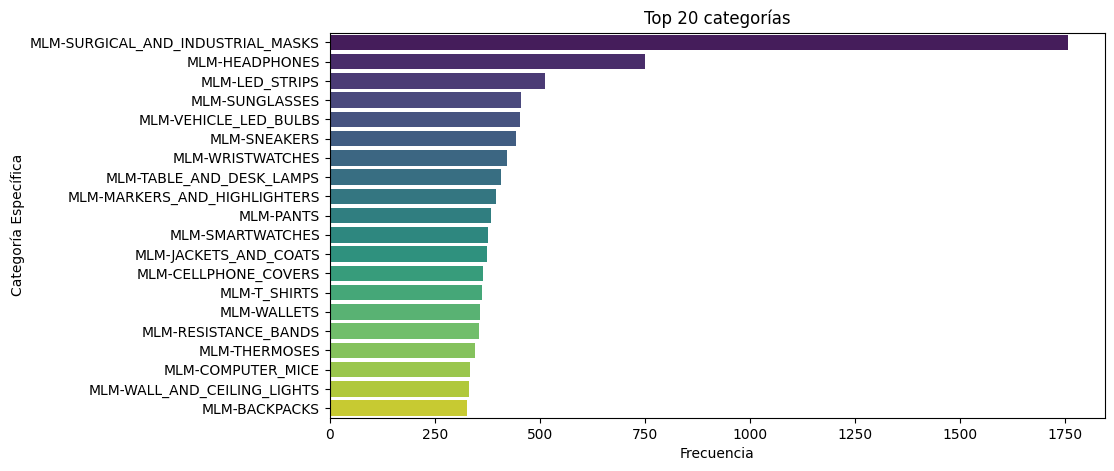

In [79]:
# Graficar top 20 frecuencias en "DOMAIN_ID"
plt.figure(figsize=(10, 5))
sns.barplot(x=frec_domain_id.values, y=frec_domain_id.index, palette="viridis")
plt.title("Top 20 categorías")
plt.xlabel("Frecuencia")
plt.ylabel('Categoría Específica');

**La categoría MLM-SURGICAL_AND_INDUSTRIAL_MASKS domina claramente con 1757 registros, sugiriendo una alta demanda o relevancia durante junio y julio del 2021.**

**Hay una caída significativa entre la primera categoría y las siguientes (MLM-HEADPHONES con 750 registros).**

**La variedad de productos indica una oferta diversa, dirigida a diferentes segmentos de mercado.**

**Se recomendaría enfocarse en las categorías líderes para entender qué productos específicos lideran las ventas.**

## Análisis multivariado

### Correlaciones

In [83]:
# Evaluar correlaciones de variables numéricas
df_numeric = df.select_dtypes(include=["float64", "int64"])
df_numeric_corr = df_numeric.corr()
df_numeric_corr

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
INVOLVED_STOCK,1.000000,0.994227,0.405833,0.557970
REMAINING_STOCK_AFTER_END,0.994227,1.000000,0.354256,0.484301
SOLD_AMOUNT,0.405833,0.354256,1.000000,0.709112
SOLD_QUANTITY,0.557970,0.484301,0.709112,1.000000


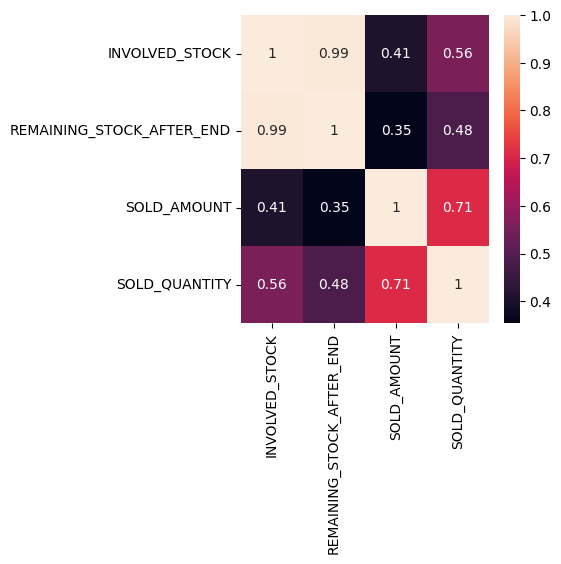

In [88]:
plt.figure(figsize=(4, 4))
sns.heatmap(df_numeric_corr, annot=True);

**La correlación entre "INVOLVED_STOCK" y "REMAINING_STOCK_AFTER_END" es extremadamente alta y positiva (0.994). Esto significa que la cantidad de stock inicial y el stock remanente después de finalizar la oferta están casi perfectamente correlacionados. Posiblemente se deba a que los productos con mayor stock inicial suelen tener más stock sobrante, indicando que no todos los productos se venden completamente.**

**"SOLD_AMOUNT" y "SOLD_QUANTITY" tienen una correlación positiva y fuerte (0.709). Esto sugiere que los productos vendidos tienen un precio relativamente constante o que la mayoría de las ventas ocurren en categorías con precios similares. Se podría explorar la existencia de categorías donde esta relación no se cumpla, para modificar los precios y evaluar si mejoran las ventas en ofertas.**

**"INVOLVED_STOCK" y "SOLD_QUANTITY" tienen una correlación moderada positiva (0.558). Un stock inicial más alto puede tender a correlacionarse con mayores ventas. Los productos más demandados probablemente tengan más stock disponible desde el principio.**

**"REMAINING_STOCK_AFTER_END" y "SOLD_QUANTITY" tienen una correlación moderada positiva (0.484). Los productos con más stock remanente tienden a haber vendido más unidades**

**"INVOLVED_STOCK" y "SOLD_AMOUNT" tienen una correlación positiva moderada baja (0.406). El stock inicial tiene una relación positiva pero no determinante con el monto de ventas.**

### Relación entre día de semana y ventas

In [93]:
# Crear columna con día de la semana
df["DAY_OF_WEEK"] = df["OFFER_START_DTTM"].dt.day_name()

In [96]:
# Verificar
df["DAY_OF_WEEK"].value_counts(dropna=False)

DAY_OF_WEEK
Friday       7644
Saturday     7336
Tuesday      7177
Thursday     7147
Wednesday    6601
Monday       6201
Sunday       5714
Name: count, dtype: int64

In [115]:
df.groupby("DAY_OF_WEEK")["SOLD_QUANTITY"].mean()

DAY_OF_WEEK
Friday        9.958399
Monday       13.568058
Saturday      8.339352
Sunday        7.099754
Thursday     11.153622
Tuesday      13.004046
Wednesday    12.242559
Name: SOLD_QUANTITY, dtype: float64

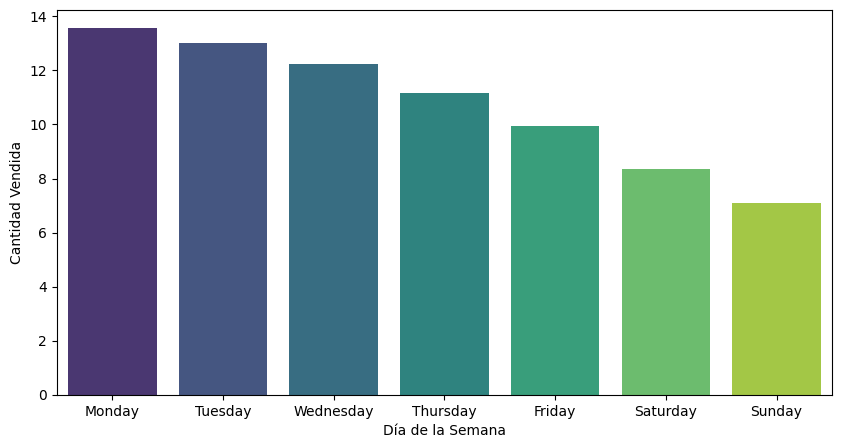

In [114]:
# Crear gráfico de barras para evaluar relación entre día de semana y unidades vendidas
plt.figure(figsize=(10, 5))
sns.barplot(x="DAY_OF_WEEK", y="SOLD_QUANTITY", data=df, estimator="mean", ci=None, palette="viridis", 
            order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.xlabel("Día de la Semana")
plt.ylabel("Cantidad Vendida");

**El lunes tiene el promedio de ventas más alto (13.57), lo cual puede indicar que las ofertas que comienzan o terminan este día son particularmente atractivas. Esto podría estar asociado al timing de las ofertas relámpago, cuando los usuarios vuelven a sus rutinas y tienen más probabilidades de comprar.**

**Los promedios disminuyen progresivamente desde el lunes hasta el domingo, mostrando una tendencia a la baja en los días del fin de semana. Es posible que los usuarios compren menos durante el fin de semana debido a actividades al aire libre o simplemente a una menor actividad online.**

**Los martes (13.00) y miércoles (12.24) muestran promedios elevados, posiblemente indicando que a mitad de semana las personas hacen compras para cubrir necesidades inmediatas.**

**El promedio cae considerablemente el viernes (9.96) y sigue bajando el sábado (8.34) y domingo (7.10).**

### Relación entre horario y ventas

In [119]:
horario_ventas = df.groupby("OFFER_START_DTTM_H")["SOLD_QUANTITY"].mean().fillna(0)
horario_ventas

OFFER_START_DTTM_H
0      0.000000
1      4.409091
2      2.750000
3     12.500000
4      0.000000
5      0.000000
6     13.000000
7      3.556383
8      6.916667
9     51.531250
10    64.891566
11    51.858995
12    40.401229
13     7.917691
14    35.040733
15    28.874780
16    20.750751
17    13.926650
18    43.597701
19     4.924805
20    65.072727
21    59.280000
22    35.545455
23     3.000000
Name: SOLD_QUANTITY, dtype: float64

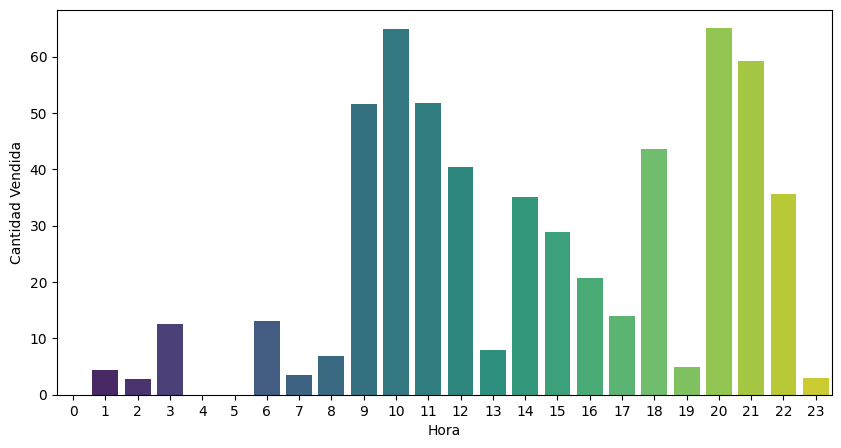

In [118]:
# Crear gráfico de barras para evaluar relación entre día de semana y unidades vendidas
plt.figure(figsize=(10, 5))
sns.barplot(horario_ventas, estimator="mean", ci=None, palette="viridis")
plt.xlabel("Hora")
plt.ylabel("Cantidad Vendida");

**Picos de promedios de ventas durante la mañana y la noche se encuentran a las 10hs (64.89) y las 8hs (65.07).**

**Parece ser que las 10hs es una hora típica para compras impulsivas después del inicio de la jornada laboral, mientras que el de las 8hs coincide con el horario post laboral donde los usuarios tienen tiempo libre para comprar.**

**Las horas entre 9hs y 12hs tienen promedios elevados, posiblemente indicando campañas matutinas efectivas.**

**Un segundo pico se observa entre 6hs y 10hs, alineado con hábitos de compra nocturnos.**

**Finalmente, a las 0hs, 4hs y 5hs se encuentran cero ventas, lo cual es razonable dado que son horarios de baja actividad. Las ventas empiezan a recuperarse a partir de las 6hs.**

**Además, se registra que el promedio de ventas disminuye progresivamente después de las 12 PM hasta alcanzar mínimos en la tarde temprana (1hs a 4hs). Esto puede deberse a que los usuarios están ocupados durante esas horas.**

### Relación entre vertical y ventas

In [120]:
vertical_ventas = df.groupby("VERTICAL")["SOLD_QUANTITY"].mean()
vertical_ventas

VERTICAL
ACC                 3.938885
APP & SPORTS        3.859034
BEAUTY & HEALTH    40.278155
CE                  4.829236
CPG                 4.725914
ENTERTAINMENT       2.005618
HOME & INDUSTRY     5.052093
OTHERS              3.000000
T & B               3.012837
Name: SOLD_QUANTITY, dtype: float64

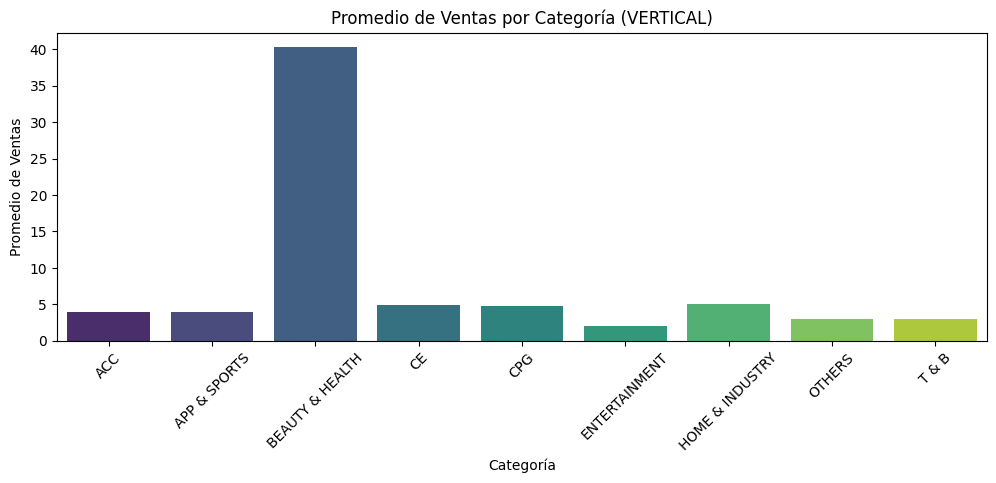

In [124]:
# Graficar relación entre vertical y ventas
plt.figure(figsize=(12, 4))
sns.barplot(x=vertical_ventas.index, y=vertical_ventas.values, palette="viridis")
plt.title("Promedio de Ventas por Categoría (VERTICAL)")
plt.xlabel("Categoría")
plt.ylabel("Promedio de Ventas")
plt.xticks(rotation=45);

**BEAUTY & HEALTH tiene, con mucha diferencia, el promedio más alto de ventas (40.28), indicando una demanda significativamente mayor en comparación con otras categorías.**

**HOME & INDUSTRY y CE muestran promedios similares (5.05 y 4.83), sugiriendo que estas categorías también tienen una demanda moderada.**

**CPG y ACC tienen promedios en el rango de 3.8 a 4.7, indicando un nivel de ventas medio.**

**ENTERTAINMENT muestra el promedio más bajo (2.01), lo que podría sugerir que esta categoría tiene una demanda significativamente menor. OTHERS y T & B tienen promedios bajos (3.00 y 3.01), indicando nichos específicos.**

### Relación entre vertical, día de la semana y ventas

In [130]:
# Crear tabla dinámica
pivot = df.pivot_table(index="VERTICAL", columns="DAY_OF_WEEK", values="SOLD_QUANTITY", aggfunc="mean")
pivot

DAY_OF_WEEK,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
VERTICAL,,,,,,,
ACC,3.846154,4.184080,3.497110,3.753086,3.995098,3.701031,4.550000
APP & SPORTS,3.694107,3.656899,3.896414,3.709756,3.753623,4.599366,3.686583
BEAUTY & HEALTH,34.215364,51.330203,31.179298,21.929435,42.891768,48.021398,46.700000
CE,4.669711,5.112605,4.588580,4.297087,5.070055,4.966667,4.989660
CPG,3.280822,5.822581,3.793478,4.546296,4.905405,4.751092,5.541872
ENTERTAINMENT,1.607143,2.230769,2.000000,1.950000,2.565217,2.045455,1.750000
HOME & INDUSTRY,5.203488,5.189076,4.545455,4.239165,5.248235,5.611043,5.106101
OTHERS,2.333333,2.050000,3.785714,2.727273,3.272727,3.619048,3.185185
T & B,2.577236,2.745283,3.140000,2.956522,2.937008,3.478992,3.267857


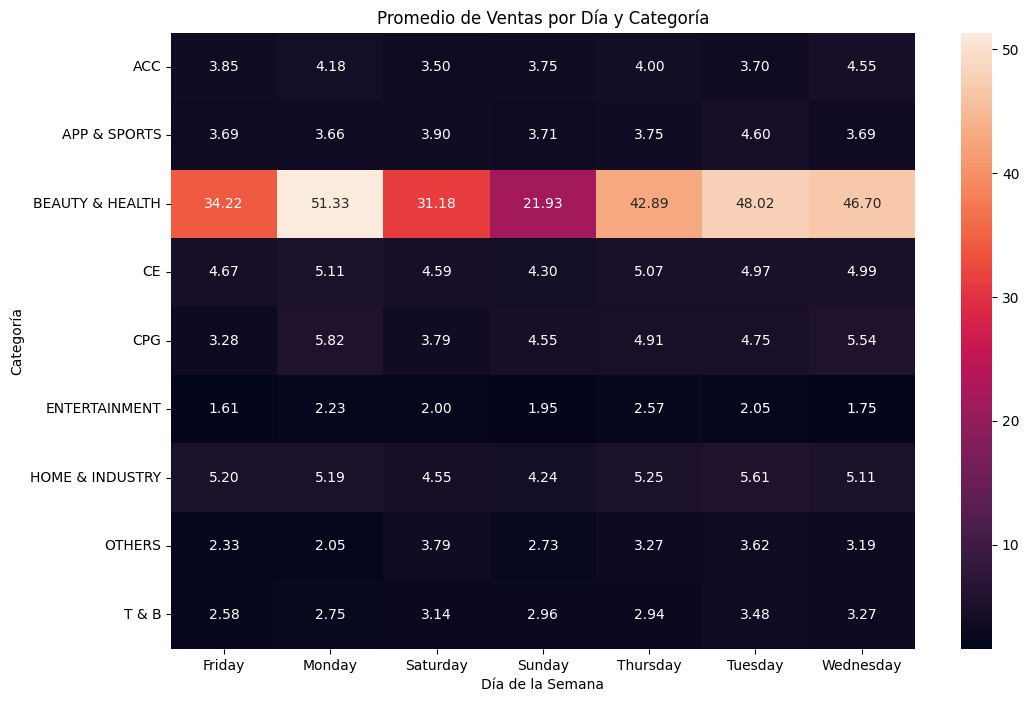

In [129]:
# Graficar
plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt=".2f")
plt.title("Promedio de Ventas por Día y Categoría")
plt.xlabel("Día de la Semana")
plt.ylabel("Categoría");

**Para BEAUTY & HEALTH, el promedio más alto se observa los lunes (51.33), seguido por martes (48.02) y miércoles (46.70).
Fines de semana (sábado y domingo) muestran promedios significativamente menores (31.17 y 21.93).**

**Esto podría indicar que los compradores de esta categoría prefieren realizar compras a inicios de semana, posiblemente debido a disponibilidad de productos.**

### Relación entre categoría, horario y ventas

In [142]:
# Crear tabla dinámica
pivot_hour = df.pivot_table(index="VERTICAL", columns="OFFER_START_DTTM_H", values="SOLD_QUANTITY", aggfunc="mean")
pivot_hour

OFFER_START_DTTM_H,1,2,3,6,7,8,9,10,11,12,...,14,15,16,17,18,19,20,21,22,23
VERTICAL,,,,,,,,,,,,,,,,,,,,,
ACC,NaN,NaN,NaN,NaN,3.504155,NaN,2.500000,NaN,1.333333,2.333333,...,1.333333,2.333333,2.000000,3.000000,3.500000,4.427632,NaN,NaN,NaN,NaN
APP & SPORTS,NaN,NaN,NaN,NaN,3.084253,1.000,4.352941,3.277778,9.548387,10.053659,...,5.439394,5.200000,2.500000,9.685714,9.166667,3.784693,11.500000,NaN,NaN,NaN
BEAUTY & HEALTH,NaN,NaN,NaN,13.0,4.063514,7.000,755.000000,129.302632,89.023881,122.935780,...,86.162921,64.218182,58.590000,41.029703,73.810526,8.864067,102.090909,76.736842,126.0,NaN
CE,4.409091,2.75,12.5,NaN,3.811695,NaN,10.400000,9.058824,5.688525,4.984848,...,7.413043,7.966667,4.919355,5.081633,8.500000,4.802849,8.909091,2.000000,1.5,NaN
CPG,NaN,NaN,NaN,NaN,2.702439,6.875,2.000000,1.500000,NaN,10.119048,...,5.055556,4.500000,6.345679,5.456140,8.045455,4.355742,63.000000,5.000000,NaN,NaN
ENTERTAINMENT,NaN,NaN,NaN,NaN,1.696970,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,1.090909,1.000000,NaN,2.323077,NaN,NaN,4.0,NaN
HOME & INDUSTRY,NaN,NaN,NaN,NaN,4.067261,19.000,1.200000,19.142857,8.247525,6.916149,...,5.827869,6.716981,3.394737,4.878049,4.500000,4.913793,3.250000,2.000000,1.0,3.0
OTHERS,NaN,NaN,NaN,NaN,3.033333,NaN,NaN,NaN,NaN,1.714286,...,NaN,3.000000,NaN,1.333333,NaN,2.586207,NaN,NaN,NaN,NaN
T & B,NaN,NaN,NaN,NaN,2.522989,NaN,NaN,NaN,4.250000,3.160000,...,2.000000,12.000000,1.583333,2.111111,1.000000,3.201646,NaN,NaN,NaN,NaN


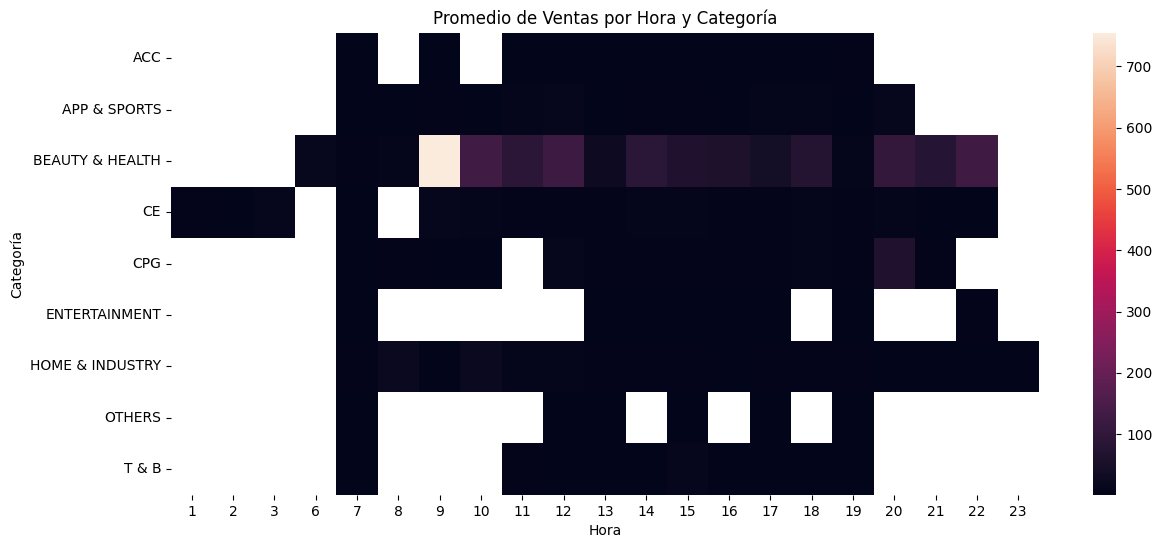

In [140]:
# Graficar
plt.figure(figsize=(14, 6))
sns.heatmap(pivot_hour, annot=False)
plt.title("Promedio de Ventas por Hora y Categoría")
plt.xlabel("Hora")
plt.ylabel("Categoría");

**Las 9, 10, 11 y 20hs son los mejores horarios para BEAUTY & HEALTH y APP & SPORTS.**

**ENTERTAINMENT y OTHERS necesitan campañas dirigidas para impulsar ventas. Adaptar las ofertas según el comportamiento horario específico de cada categoría podría mejorar significativamente las ventas.**

# Conclusiones